In [144]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
import subprocess
import ipywidgets as widgets
import pandas as pd
import make_csv
import BBN_Values as BBN_V
import os 
import BBN_Diagnostic as BBN_D

The function below takes a mass file as an input as well as a file-name that you would like to be saved. It will be saved as a .npz file and should be the input to generate_2 and generate_3

In [145]:
def generate_1(filename,saved_file): 
    BBN_V.imp_values(filename,saved_file)

This function takes saved_file and generates all the CSV files. In order to make sure the function has ran correctly, go to downloads-->BBN_model-->alterbbn_v2.2-->CSVFiles. All the files here should have been updated seconds ago if the function is running correctly. 

In [146]:
def generate_2(saved_file):
    make_csv.generate_csv(saved_file, folder_name="alterbbn_v2.2/CSVFiles/")

This function takes saved_file as in input as well. It then runs the file alter_vs.c to generate a new evolution_vs.out file. In order to make sure this function has run correctly go to downloads-->BBN_models. The file called evolution_vs.out should have been updated seconds ago if the function was running correctly with no errors. 

In [147]:
def generate_3(saved_file):
    actual_data= np.load(saved_file, allow_pickle=True)
    T_init = actual_data['T_initial']
    eta_init = actual_data['eta_initial']
    fail_safe = actual_data['failsafe']
    ns_init = actual_data['ns_0']
    m_s = actual_data['vs_mass']
    mix = actual_data['mix_ang']
    row = actual_data['row']

    subprocess.run(['./alterbbn_v2.2/alter_vs.x', str(T_init),str(eta_init),str(fail_safe),str(row),str(ns_init),str(m_s),str(mix)], capture_output = True, text = False)

generates diagnostics as a test 

In [159]:
def generate_4(filename,saved_file,evolution_file):
    actual_data= np.load(filename, allow_pickle=True)
    f_array = actual_data['fe']
    e_array = actual_data['e']
    temp_cm = actual_data['Tcm']
    m_s = actual_data['mass']#in MeV
    t = actual_data['time']*1000*6.582*10**-25#conversion to seconds for plots 
    a = actual_data['scalefactors']
    life = actual_data['lifetime']/(6.58*10**-25)*1/1000 #seconds need to be converted to inverse MeV
    temp = actual_data['temp'] #units of MeV
    decay = actual_data['decayrate']
    coll = actual_data['collisionrate']
    p_n = actual_data['p_n_rate']
    n_p = actual_data['n_p_rate']
    T_reversed = temp[::-1]

    
    more_data= np.load(saved_file, allow_pickle=True)
    p_e = more_data['pe_dens']
    p_e_reversed = p_e[::-1]

    
    time,scale,temperature = np.loadtxt(evolution_file,delimiter=',',skiprows=1,usecols=(0,1,2),unpack=True)
    all_data = np.loadtxt(evolution_file,delimiter=',',skiprows=1,unpack=True)
    
    plt.figure()
    plt.loglog(time,(scale*temperature)/(scale[0]*temperature[0]),color='red')
    plt.loglog(t,(a*temp)/(a[0]*temp[0]),color='red',linestyle='--')
    plt.show()
    
    plt.figure()
    plt.loglog(T_reversed,p_e_reversed/(T_reversed**4),color='red')
    plt.show()
    
    return all_data

In [198]:
o_folder_contents = os.listdir("../RMFK_Results/")
npz_files = [item for item in o_folder_contents if item.endswith(".npz")]

In [199]:
npz_files.sort()

In [200]:
folder_contents = os.listdir("../BBN_models/")
processed_m_files = [item for item in folder_contents if item.startswith("processed")]

In [201]:
processed_m_files.sort()

Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


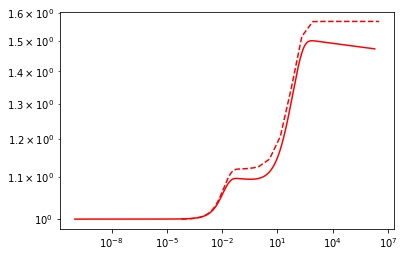

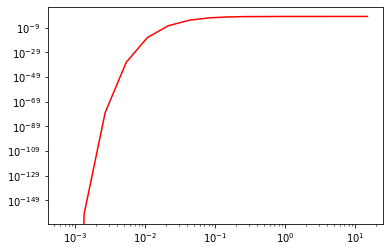

diagnostic graphs for mass-300-life-0.010.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


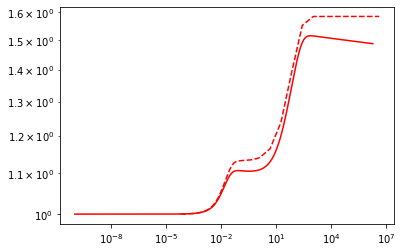

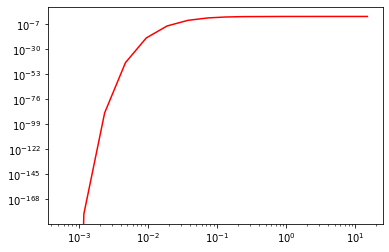

diagnostic graphs for mass-300-life-0.013.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


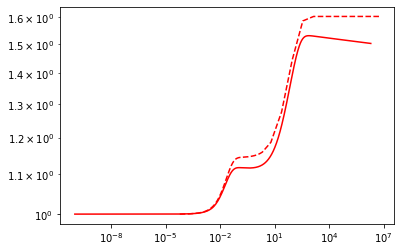

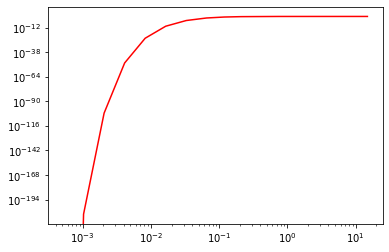

diagnostic graphs for mass-300-life-0.017.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


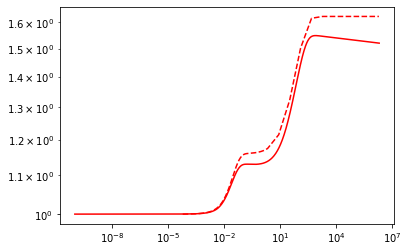

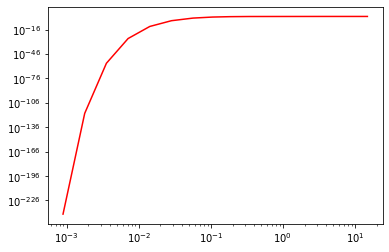

diagnostic graphs for mass-300-life-0.022.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


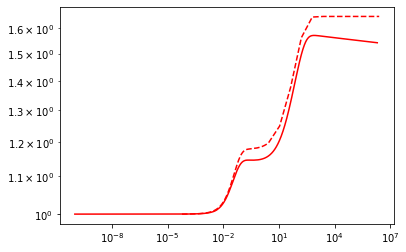

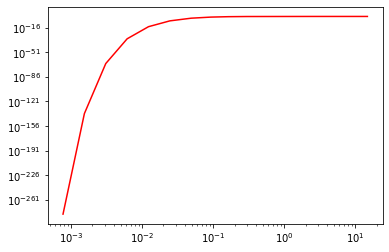

diagnostic graphs for mass-300-life-0.030.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


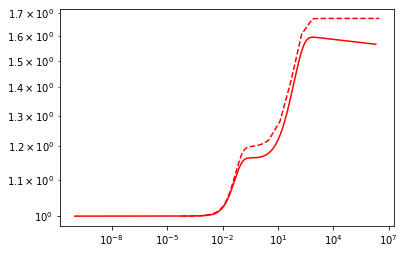

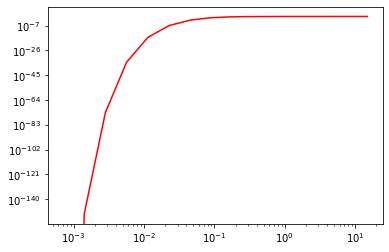

diagnostic graphs for mass-300-life-0.040.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


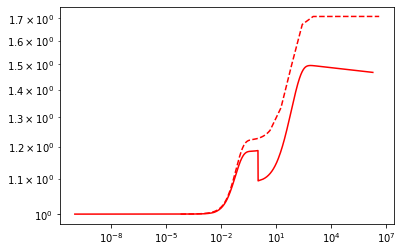

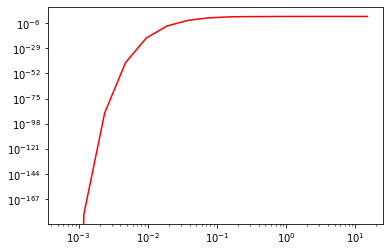

diagnostic graphs for mass-300-life-0.053.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


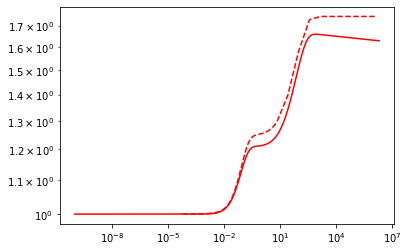

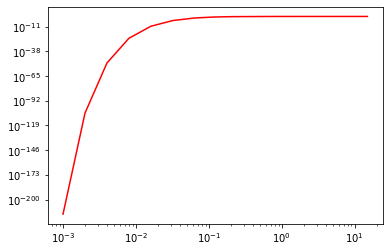

diagnostic graphs for mass-300-life-0.070.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


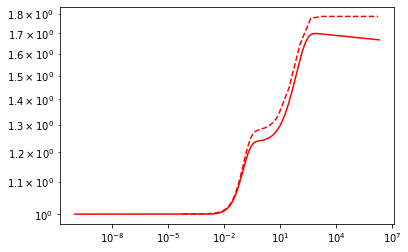

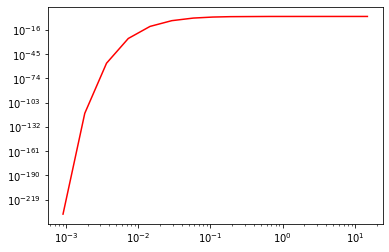

diagnostic graphs for mass-300-life-0.093.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


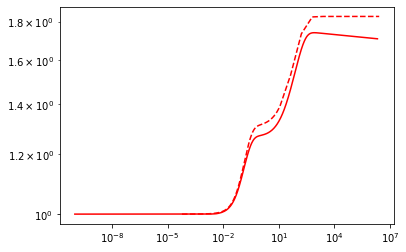

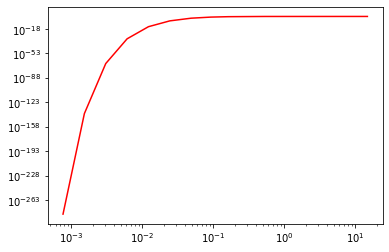

diagnostic graphs for mass-300-life-0.122.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


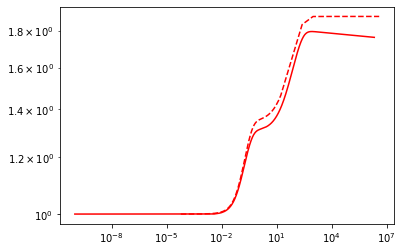

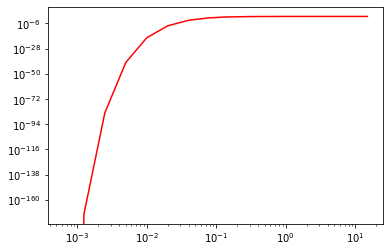

diagnostic graphs for mass-300-life-0.166.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


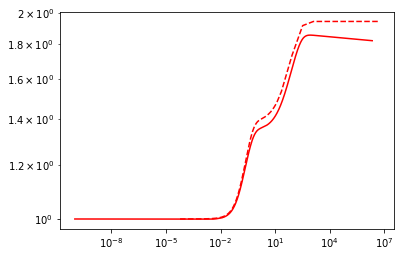

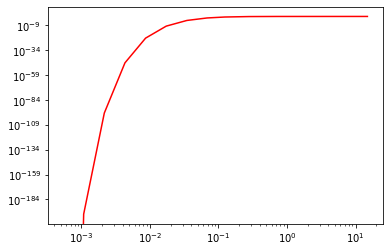

diagnostic graphs for mass-300-life-0.221.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


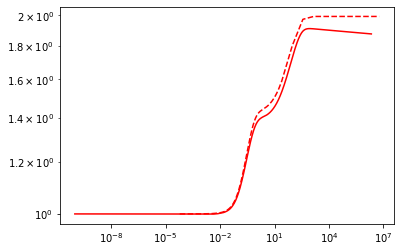

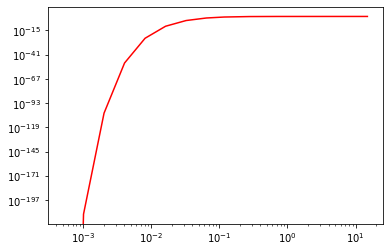

diagnostic graphs for mass-300-life-0.282.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


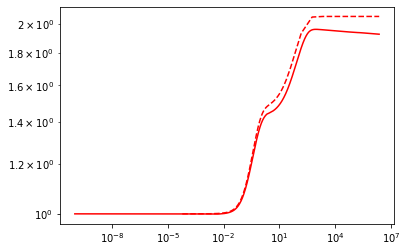

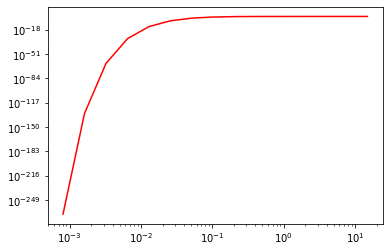

diagnostic graphs for mass-300-life-0.373.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


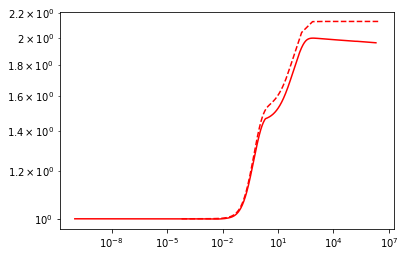

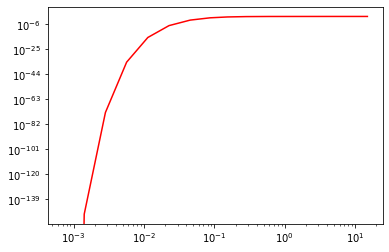

diagnostic graphs for mass-300-life-0.517.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


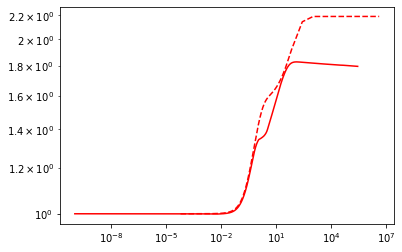

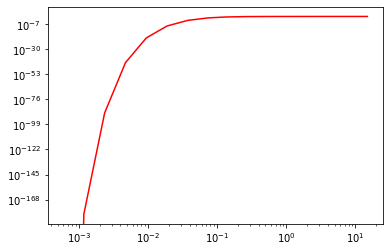

diagnostic graphs for mass-300-life-0.664.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


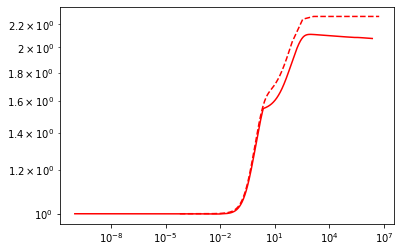

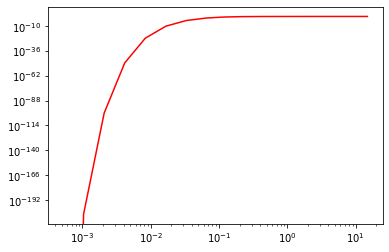

diagnostic graphs for mass-300-life-0.912.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


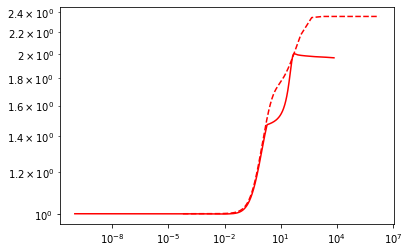

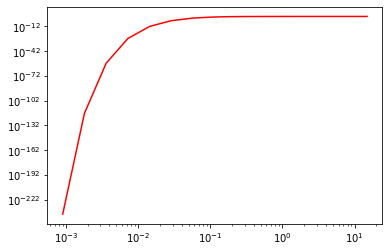

diagnostic graphs for mass-300-life-1.236.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


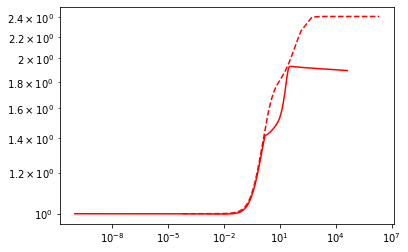

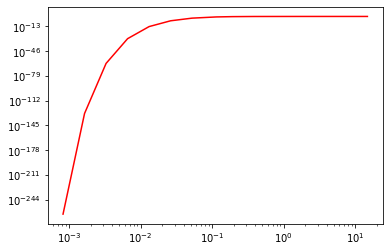

diagnostic graphs for mass-300-life-1.495.npz above
Directory exists
.csv files generated in alterbbn_v2.2/CSVFiles/


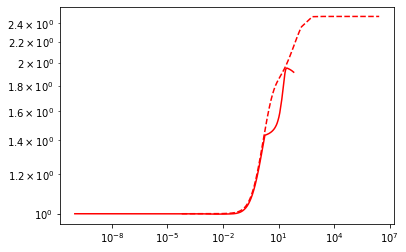

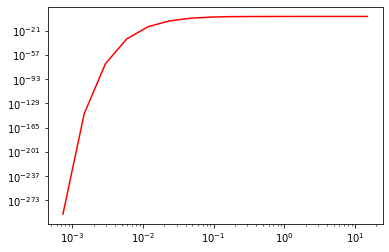

diagnostic graphs for mass-300-life-1.846.npz above


In [202]:
for i in range(len(processed_m_files)):
    p_m_file = processed_m_files[i]
    npz_file = npz_files[i]

    generate_2(f"{p_m_file}")
    generate_3(f"{p_m_file}")

    BBNA = generate_4(f"../RMFK_Results/{npz_file}", f"{p_m_file}", "evolution_vs.out")
    print(f"diagnostic graphs for {npz_file} above")
    np.savez(f"BBN-Abdundances-{npz_file}",BBN_abun = BBNA)
    
    
    
    